In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('data/dataset.csv')

In [3]:
print(data.columns)
print(data.head())

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7

In [ ]:
import importlib
import cleanData

#cleaning the data to remove redundant column and create some features which will be used later

importlib.reload(cleanData)

from cleanData import clean_data

In [5]:
cleanedData = clean_data(data)

e:\Codes\HotelPlatform\src\cleanData.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(0, inplace=True)
e:\Codes\HotelPlatform\src\cleanData.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [6]:
print(cleanedData.columns)
print(cleanedData.head())

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_length', 'total_guests', 'is_family', 'season'],
      dtype='object')
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737    

In [7]:
cleanedData.isnull().sum()[cleanedData.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
from metric import revenue_efficiency_index

cleanedData['revenue_efficiency_index'] = revenue_efficiency_index(cleanedData)

cleanedData['revenue_efficiency_index'].describe()



count    119390.000000
mean          0.071570
std           0.067182
min          -0.012760
25%           0.029200
50%           0.053400
75%           0.089250
max           1.518000
Name: revenue_efficiency_index, dtype: float64

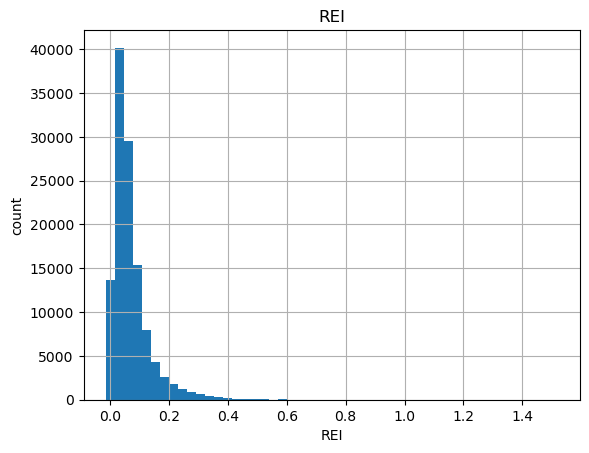

In [9]:
cleanedData['revenue_efficiency_index'].hist(bins=50)
plt.title('REI')
plt.xlabel('REI')
plt.ylabel('count')
plt.show()

In [10]:
import metric
importlib.reload(metric)
from metric import guest_satisfaction_yield

cleanedData['guest_satisfaction_yield'] = guest_satisfaction_yield(cleanedData)
cleanedData['guest_satisfaction_yield'].describe()


count    119390.000000
mean          0.016253
std           0.005423
min           0.012000
25%           0.014280
50%           0.015445
75%           0.016253
max           0.120000
Name: guest_satisfaction_yield, dtype: float64

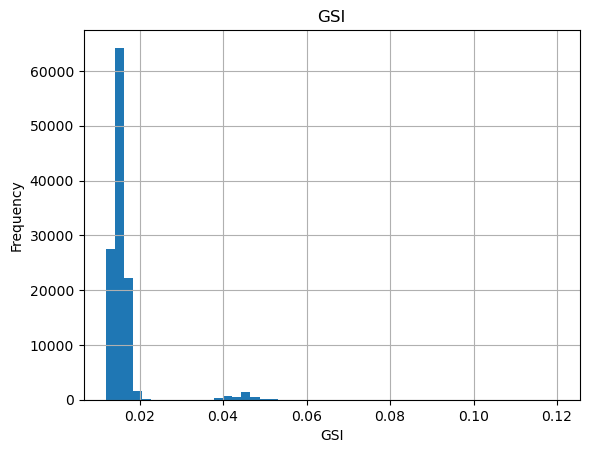

In [11]:
cleanedData['guest_satisfaction_yield'].hist(bins = 50)
plt.title('GSI')
plt.xlabel('GSI')
plt.ylabel('Frequency')
plt.show()

In [12]:
import metric
importlib.reload(metric)
from metric import amenity_utilization_ratio

cleanedData['amenity_utilization_ratio'] = amenity_utilization_ratio(cleanedData)
cleanedData['amenity_utilization_ratio'].describe()

count    119390.000000
mean         10.856323
std           5.144523
min           0.000000
25%           7.373067
50%          10.080000
75%          13.440000
max         100.000000
Name: amenity_utilization_ratio, dtype: float64

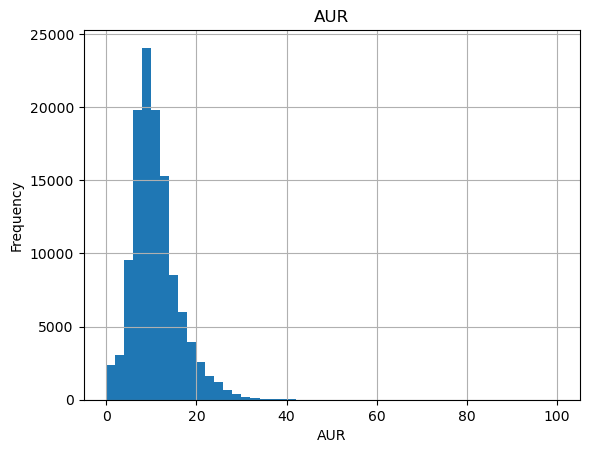

In [13]:
cleanedData['amenity_utilization_ratio'].hist(bins=50)
plt.title('AUR')
plt.xlabel('AUR')
plt.ylabel('Frequency')
plt.show()

In [14]:
import metric
importlib.reload(metric)
from metric import loyalty_generation_score

cleanedData['loyalty_generation_score'] = loyalty_generation_score(cleanedData)
cleanedData['loyalty_generation_score'].describe()

count    119390.000000
mean          0.001881
std           0.060803
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.630000
Name: loyalty_generation_score, dtype: float64

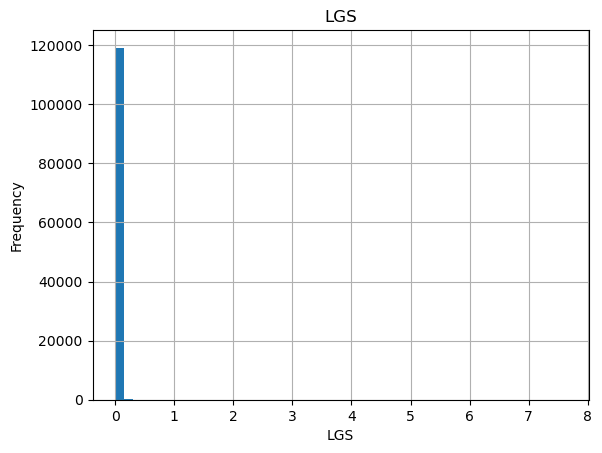

In [15]:
cleanedData['loyalty_generation_score'].hist(bins=50)
plt.title('LGS')
plt.xlabel('LGS')
plt.ylabel('Frequency')
plt.show()


In [16]:
import metric
importlib.reload(metric)
from metric import operational_excellence_metric

cleanedData['operational_excellence_metric'] = operational_excellence_metric(cleanedData)
cleanedData['operational_excellence_metric'].describe()

count    119390.000000
mean          0.507757
std           0.128319
min           0.383400
25%           0.421249
50%           0.440208
75%           0.639000
max           3.294000
Name: operational_excellence_metric, dtype: float64

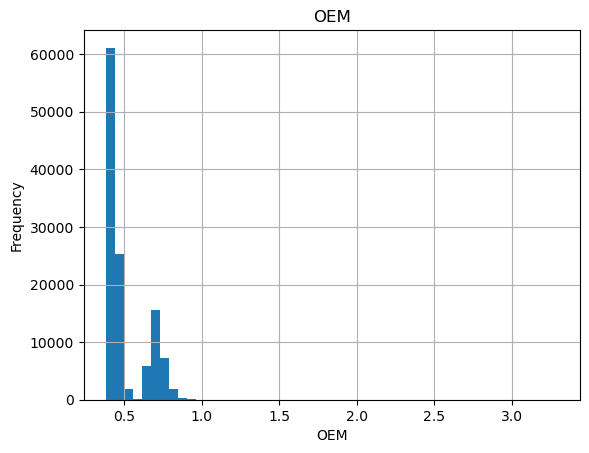

In [17]:
cleanedData['operational_excellence_metric'].hist(bins=50)
plt.title('OEM')
plt.xlabel('OEM')
plt.ylabel('Frequency')
plt.show()

In [18]:
# starting segmentation

In [19]:
def promo_sensitivity(segment):
    if segment in ['Online TA', 'Direct']:
        return 1
    return 0.5


In [20]:


cleanedData['total_revenue'] = cleanedData['adr'] * cleanedData['stay_length']
cleanedData['promo_sensitivity'] = cleanedData['market_segment'].apply(promo_sensitivity)
cleanedData['simulated_complaints'] =  (cleanedData['is_canceled']) + (cleanedData['adr'] < 50).astype(int) + (cleanedData['stay_length'] <= 1).astype(int)

In [ ]:
from segmentation import segment_guests

features = [
    'lead_time',
    'adr',
    'stay_length',
    'total_revenue',
    'amenity_utilization_ratio',
    'promo_sensitivity',
    'simulated_complaints',
    'is_repeated_guest'
]


# 4 clusters was chosen because in 3 clusters, each cluster had a lot fo defining features, making the analysis difficult
# on selecting 5 clusters, the segments did not have enough defining features, or the segements could be combined to form better segement
#hence 4 clusters was chosen
cleanedData = segment_guests(cleanedData, features, n_clusters=4)

print(cleanedData['guest_segment'].value_counts())
print(cleanedData.groupby('guest_segment')[features].mean())



guest_segment
0    51401
3    45273
1    18954
2     3762
Name: count, dtype: int64
                lead_time         adr  stay_length  total_revenue  \
guest_segment                                                       
0               71.645143   99.540163     2.918328     277.522445   
1              101.660177  172.152553     5.884404     911.329991   
2               29.666932   62.494009     1.814460     130.877477   
3              147.920770   78.260150     3.112076     236.186173   

               amenity_utilization_ratio  promo_sensitivity  \
guest_segment                                                 
0                              10.614211           0.999708   
1                              18.337779           0.927456   
2                               6.666010           0.679160   
3                               8.347218           0.501767   

               simulated_complaints  is_repeated_guest  
guest_segment                                           
0       

In [22]:
# visualising the segments

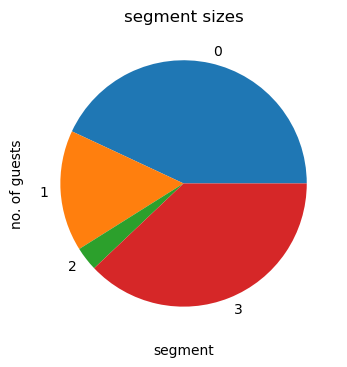

In [23]:
segment_counts = cleanedData['guest_segment'].value_counts().sort_index()

plt.figure(figsize=(4, 4))
segment_counts.plot(kind='pie')
plt.title('segment sizes')
plt.xlabel('segment')
plt.ylabel('no. of guests')
plt.show()


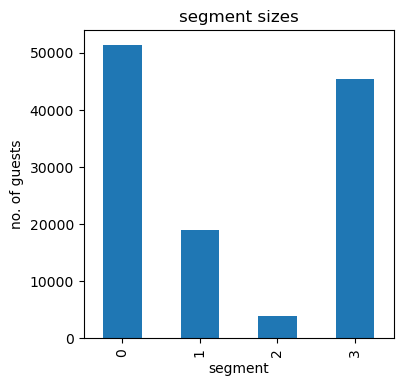

In [24]:
segment_counts = cleanedData['guest_segment'].value_counts().sort_index()

plt.figure(figsize=(4, 4))
segment_counts.plot(kind='bar')
plt.title('segment sizes')
plt.xlabel('segment')
plt.ylabel('no. of guests')
plt.show()

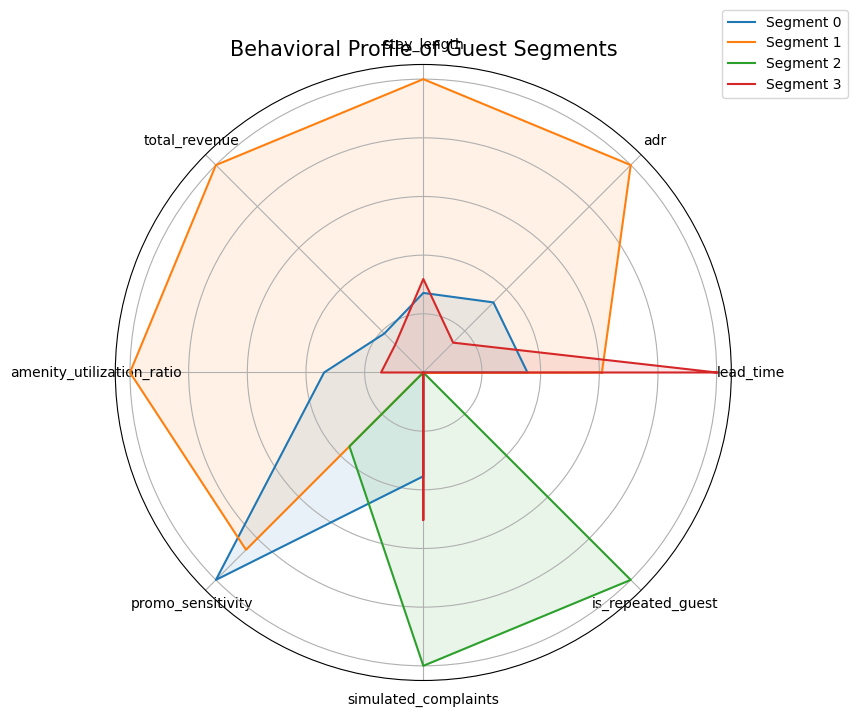

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

segment_means = cleanedData.groupby('guest_segment')[features].mean()

normalized = (segment_means - segment_means.min()) / (segment_means.max() - segment_means.min())

labels = normalized.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i in normalized.index:
    values = normalized.loc[i].tolist()
    values += values[:1]  
    ax.plot(angles, values, label=f"Segment {i}")
    ax.fill(angles, values, alpha=0.1)

ax.set_title("Behavioral Profile of Guest Segments", size=15)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


Results:

SEGMENT 0: 
"budget travelers", spend average amounts, sensitive to promotions, less than average number of complaints

SEGMENT 1:
premium guests, spend a lot, highly sensitive to promotions, but they are not loyal (low number of repeated guests)

SEGMENT 2:
highly loyal customer base, but also have more complaints

SEGMENT 3:
business people or people who planned for vacations well in advance (due to high lead_time), spend average amounts 

In [27]:
segment_labels = {
    0: 'Promo Hunters',
    1: 'High Value Guests',
    2: 'Loyal Budget Guests',
    3: 'Planners on a Budget'
}

cleanedData['segment_label'] = cleanedData['guest_segment'].map(segment_labels)

cleanedData['segment_label'].value_counts()


segment_label
Promo Hunters           51401
Planners on a Budget    45273
High Value Guests       18954
Loyal Budget Guests      3762
Name: count, dtype: int64

Starting Predictive Analysis: 
First is guest satisfaction score

In [28]:
cleanedData['guest_satisfaction_score'] = 70 + (cleanedData['adr'].clip(lower=0)/10) - cleanedData['is_canceled']*10

#features used to predict satisfaction score:
features = [
    'adr',
    'stay_length',
    'total_guests',
    'amenity_utilization_ratio',
    'promo_sensitivity',
    'simulated_complaints',
    'is_repeated_guest'
]

import predictions

importlib.reload(predictions)

from predictions import train_regression_model

model, r2, error = train_regression_model(cleanedData, features, 'guest_satisfaction_score')

print(f"R2 score: {r2:.4f}")
print(f"Mean Squared Error: {error: .4f}")

R2 score: 0.9999
Mean Squared Error:  0.0025


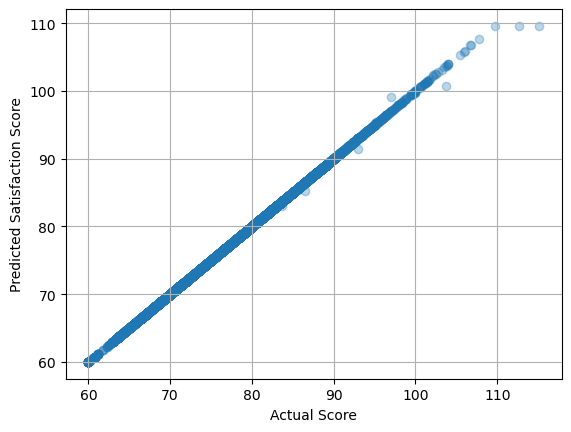

In [29]:
#visualising the results:

from sklearn.model_selection import train_test_split
X = cleanedData[features]
Y = cleanedData['guest_satisfaction_score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Satisfaction Score')
plt.grid(True)
plt.show()

In [30]:
def get_season(month):
    m = month.month
    return (
        'Winter' if m in [12, 1, 2] else
        'Spring' if m in [3, 4, 5] else
        'Summer' if m in [6, 7, 8] else
        'Fall'
    )

In [48]:
# Room Bookings predictions
cleanedData['arrival_date'] = pd.to_datetime(cleanedData['arrival_date'])
cleanedData['month'] = cleanedData['arrival_date'].dt.to_period('M').dt.to_timestamp()

monthly_grouped = cleanedData.groupby(['month', 'assigned_room_type']).agg({
    'reservation_status': 'count'
}).reset_index()
monthly_grouped.columns = ['month', 'room_type', 'bookings']

monthly_grouped['season'] = monthly_grouped['month'].apply(get_season)

monthly_grouped = pd.get_dummies(monthly_grouped, columns=['season'], drop_first=True)





C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19612\3223833903.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_grouped = cleanedData.groupby(['month', 'assigned_room_type']).agg({


In [49]:
import importlib
import predictions
importlib.reload(predictions)
from predictions import forecast_occupancy

forecast_data = forecast_occupancy(monthly_grouped)
forecast_data.head()
#forecast_data.describe()

c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\Lenovo\.conda\envs\talon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


,month,room_type,predicted_bookings
0,2017-09-01,A,3485.204590
1,2017-10-01,A,3716.799561
2,2017-11-01,A,3532.640137
3,2017-12-01,A,2938.440674
4,2018-01-01,A,2692.657471


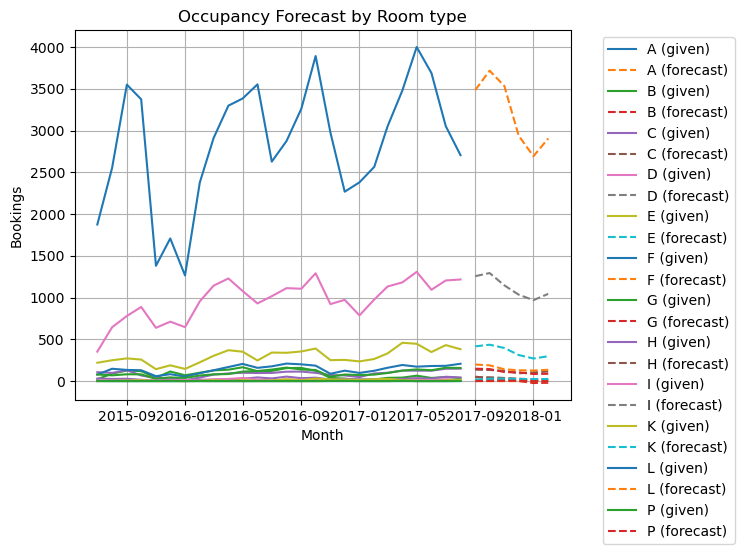

In [50]:
for room in forecast_data['room_type'].unique():
    history = monthly_grouped[monthly_grouped['room_type'] == room]
    future = forecast_data[forecast_data['room_type'] == room]

    plt.plot(history['month'], history['bookings'], label=f'{room} (given)')
    plt.plot(future['month'], future['predicted_bookings'], '--', label=f'{room} (forecast)')

plt.title("Occupancy Forecast by Room type")
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
forecast_data.to_csv("data/forecast_output.csv", index=False)
#saving the data to use it later in the dashboard

In [52]:
# revenue potential based on guest segments:
segment_revenue = cleanedData.groupby('segment_label').agg({
    'total_revenue': ['sum', 'mean'],
    'adr': 'mean',
    'stay_length': 'mean',
    'guest_segment': 'count'
}).reset_index()

segment_revenue.columns = [
    'segment_label',
    'total_revenue_sum',
    'avg_revenue_per_guest',
    'avg_adr',
    'avg_stay_length',
    'guest_count'
]

segment_revenue.sort_values(by='total_revenue_sum', ascending=False, inplace=True)
segment_revenue.head()


,segment_label,total_revenue_sum,avg_revenue_per_guest,avg_adr,avg_stay_length,guest_count
0,High Value Guests,17273348.65,911.329991,172.152553,5.884404,18954
3,Promo Hunters,14264931.22,277.522445,99.540163,2.918328,51401
2,Planners on a Budget,10692856.59,236.186173,78.260150,3.112076,45273
1,Loyal Budget Guests,492361.07,130.877477,62.494009,1.814460,3762


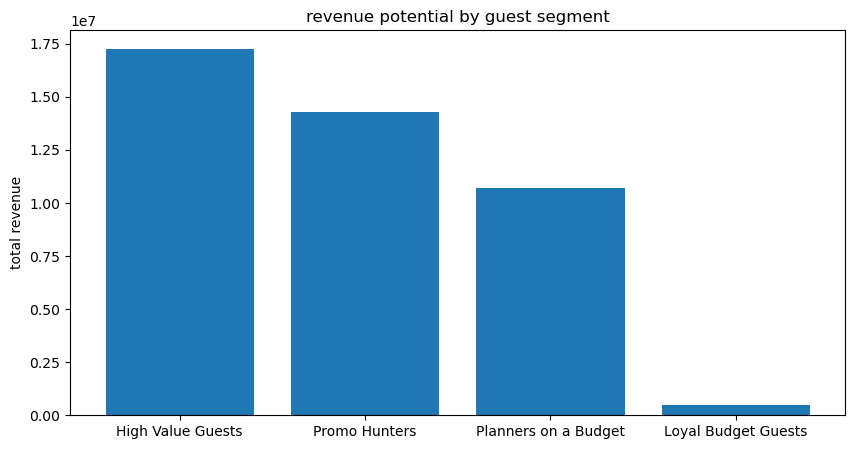

In [53]:
plt.figure(figsize=(10,5))
plt.bar(segment_revenue['segment_label'], segment_revenue['total_revenue_sum'])
plt.ylabel("total revenue")
plt.title("revenue potential by guest segment")
plt.show()

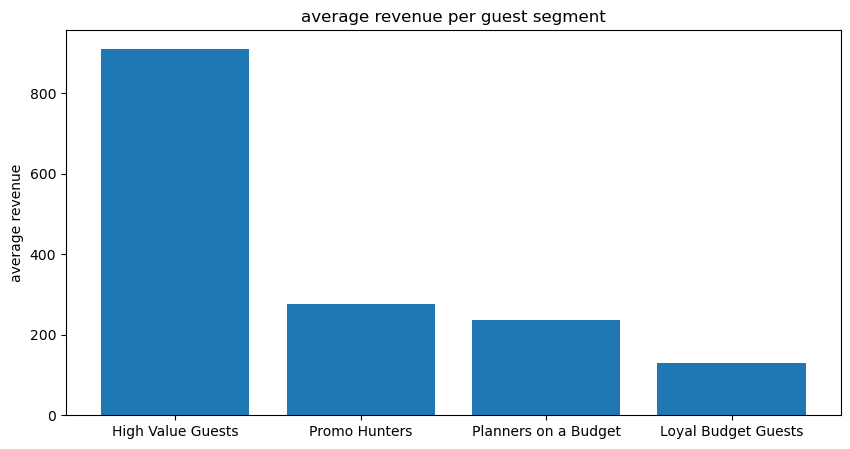

In [54]:
plt.figure(figsize=(10,5))
plt.bar(segment_revenue['segment_label'], segment_revenue['avg_revenue_per_guest'])
plt.ylabel("average revenue")
plt.title("average revenue per guest segment")
plt.show()

In [55]:
import metric
importlib.reload(metric)
from metric import loyalty_generation_score

cleanedData['loyalty_generation_score'] = loyalty_generation_score(cleanedData)
cleanedData['loyalty_generation_score'].describe()

count    119390.000000
mean          0.001881
std           0.060803
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.630000
Name: loyalty_generation_score, dtype: float64

In [73]:
#Predicting Amenities

cleanedData['arrival_date'] = pd.to_datetime(cleanedData['arrival_date'])
cleanedData['month'] = cleanedData['arrival_date'].dt.to_period('M').dt.to_timestamp()

usage_data = cleanedData[cleanedData['is_canceled'] == 0].copy()

monthly = usage_data.groupby('month').agg({
    'amenity_utilization_ratio': 'mean',
    'adr': 'mean',
    'lead_time': 'mean',
    'stay_length': 'mean',
    'total_guests': 'mean',
    'total_revenue': 'mean',
    'is_family': 'mean',
    'is_repeated_guest': 'mean'
}).reset_index()

monthly['month_num'] = monthly['month'].map(lambda x: x.toordinal())
monthly['month_sin'] = np.sin(2 * np.pi * monthly['month'].dt.month / 12)
monthly['month_cos'] = np.cos(2 * np.pi * monthly['month'].dt.month / 12)

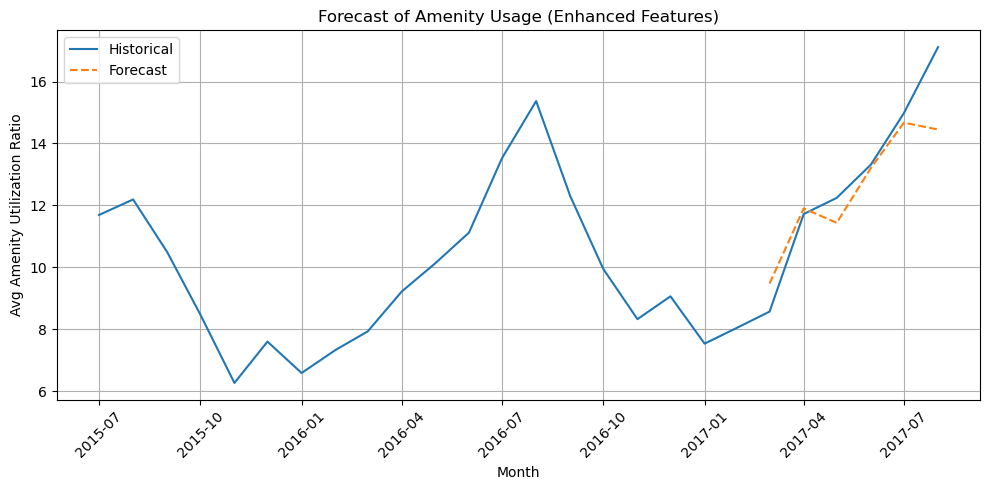

In [74]:
import predictions
importlib.reload(predictions)
from predictions import forecast_amenity_usage

forecast_amenities = forecast_amenity_usage(monthly)

forecast_amenities.to_csv('data/forecast_amenities.csv', index=False)

plt.figure(figsize=(10, 5))
plt.plot(monthly['month'], monthly['amenity_utilization_ratio'], label='Historical')
plt.plot(forecast_amenities['month'], forecast_amenities['predicted_amenity_usage'], '--', label='Forecast')
plt.xlabel('Month')
plt.ylabel('Avg Amenity Utilization Ratio')
plt.title('Forecast of Amenity Usage (Enhanced Features)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
import networkx as nx
from collections import Counter

In [59]:
import journey_map
importlib.reload(journey_map)
from journey_map import build_journey_stages

In [ ]:
journey_data = cleanedData
n = 100000 # number of guests to track
journey_data = pd.DataFrame({
    'is_canceled': np.random.choice([0, 1], size=n, p=[0.8, 0.2]),
    'amenity_utilization_ratio': np.random.exponential(5, size=n),
    'simulated_complaints': np.random.choice([0, 1], size=n, p=[0.9, 0.1]),
    'reservation_status': np.random.choice(['Check-Out', 'Canceled'], size=n, p=[0.8, 0.2]),
    'is_repeated_guest': np.random.choice([0, 1], size=n, p=[0.85, 0.15])
})

journey = journey_data.apply(build_journey_stages, axis=1)




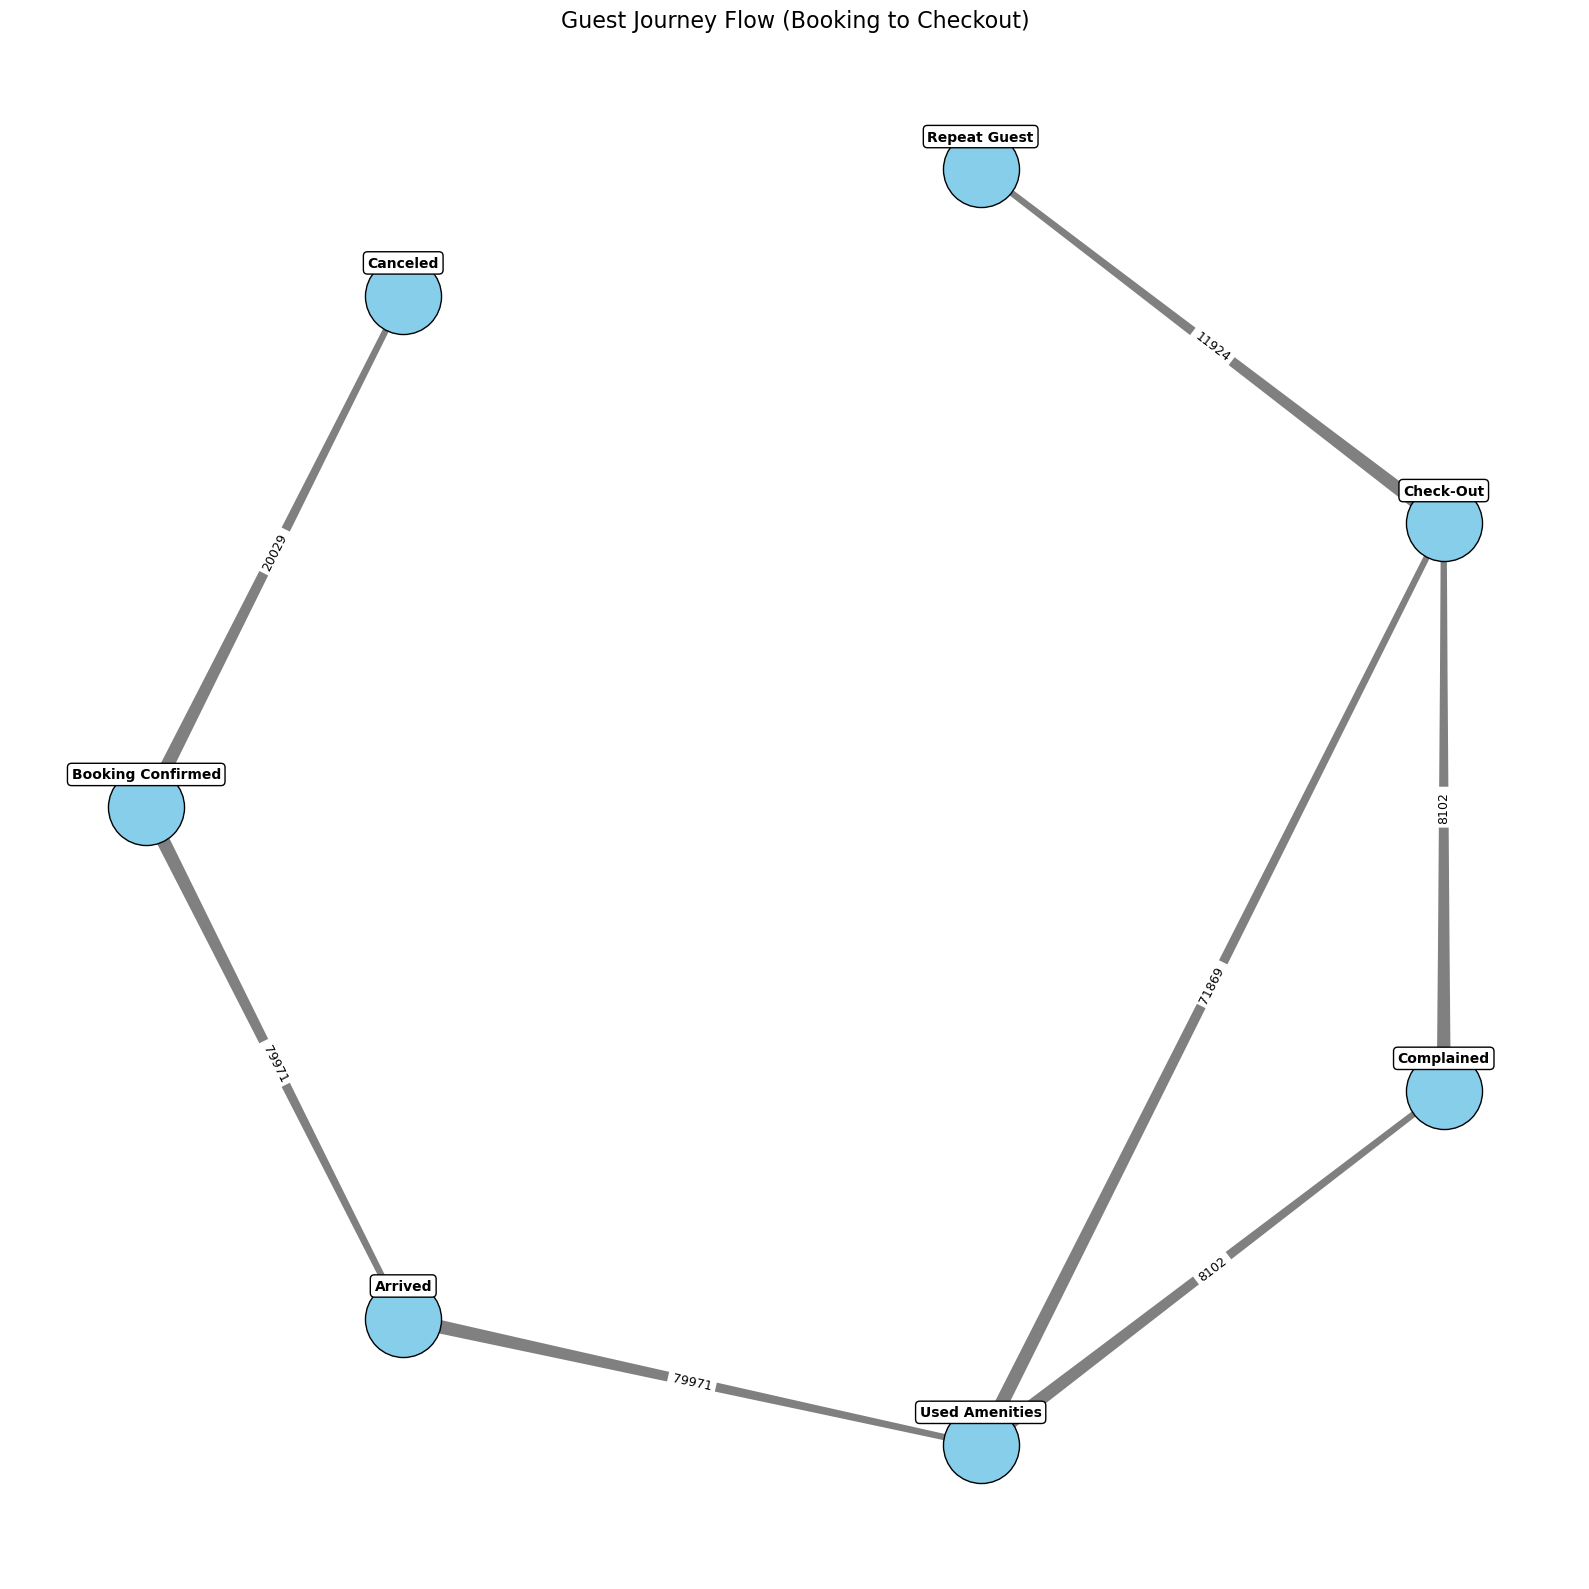

In [ ]:
edges = Counter()
for path in journey:
    for i in range(len(path) - 1):
        edges[(path[i], path[i + 1])] += 1

G = nx.DiGraph()
for (src, tgt), count in edges.items():
    G.add_edge(src, tgt, weight=count)

node_order = ['Booking Confirmed', 'Arrived', 'Used Amenities', 'Complained', 'Check-Out', 'Repeat Guest', 'Canceled']
pos = nx.shell_layout(G, nlist=[node_order])

plt.figure(figsize=(16, 16))

nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', edgecolors='black')

nx.draw_networkx_edges(G, pos, arrowstyle='fancy', arrowsize=20, width=2, edge_color='gray')

for node, (x, y) in pos.items():
    plt.text(x, y + 0.05, node, fontsize=10, fontweight='bold', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Guest Journey Flow", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()



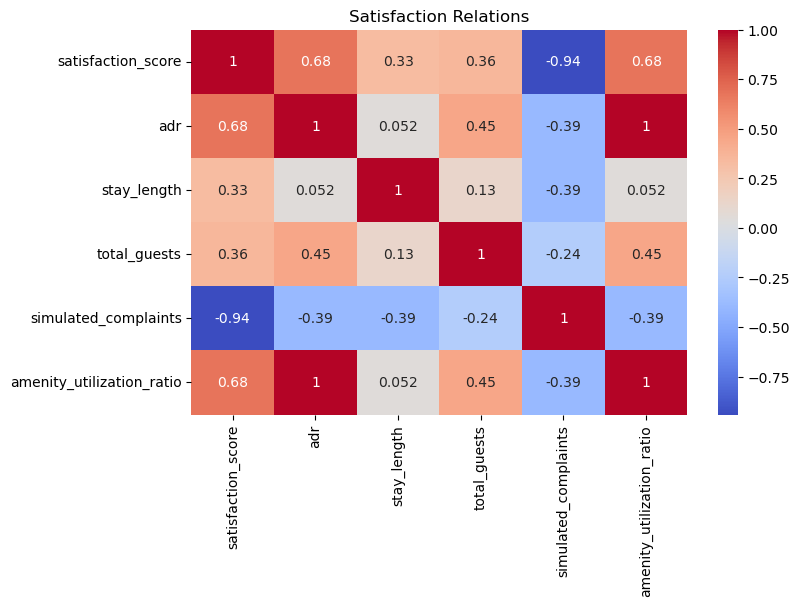

In [62]:
# ○	Identify critical satisfaction drivers and pain points

import seaborn as sns

completed = cleanedData[cleanedData['is_canceled'] == 0].copy()


completed['satisfaction_score'] = (
    70 + (completed['amenity_utilization_ratio'] * 0.5)
    - (completed['simulated_complaints'] * 10)
)

plt.figure(figsize=(8, 5))
sns.heatmap(completed[['satisfaction_score', 'adr', 'stay_length', 'total_guests',
                       'simulated_complaints', 'amenity_utilization_ratio']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Satisfaction Relations")
plt.show()


Service Recovery Rate: 4.35% of guests who complained became repeat guests


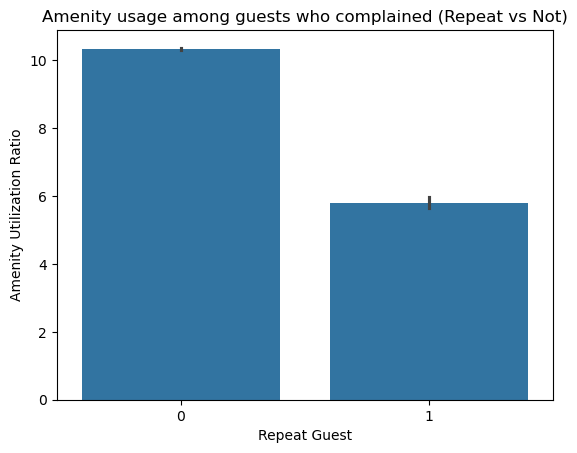

In [63]:
# ○	Track service recovery patterns after complaints
# checking whether people who complained returned later

who_complained = cleanedData[cleanedData['simulated_complaints'] > 0]

recovery_rate = who_complained['is_repeated_guest'].mean()
print(f"Service Recovery Rate: {recovery_rate:.2%} of guests who complained became repeat guests")

sns.barplot(data=who_complained, x='is_repeated_guest', y='amenity_utilization_ratio')
plt.title("Amenity usage among guests who complained (Repeat vs Not)")
plt.xlabel("Repeat Guest")
plt.ylabel("Amenity Utilization Ratio")
plt.show()



In [64]:
# ○	Highlight decision points for upsell opportunities
# these are people who satyed longer and used more amenities, or made special requests, as these might be the wealthy segment and 
# could afford more and better amneties
# finding the number of these people

upsell_guests = cleanedData[
    (cleanedData['amenity_utilization_ratio'] > 5) & 
    (cleanedData['stay_length'] > 3) & 
    (cleanedData['total_of_special_requests'] > 0)
]

print(f"Guests suitable for upsell offers: {len(upsell_guests)}")



Guests suitable for upsell offers: 19463


In [65]:
cleanedData.to_csv("../data/cleanedData.csv", index=False)

In [67]:
cleanedData.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_length', 'total_guests', 'is_family', 'season',
       'revenue_efficiency_index', 'guest_satisfaction_yield',
       'amenity_utilization_ratio', 'loyalty_generation_score',
       'operational_excellence_metric', 'total_revenue', 'promo_sensitivity',
       'simulated_compl